In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

## Cellular Automata

In [2]:
# Step evolution

def ca_evaluate(rule, state):
    
    binary_rule=[int(x) for x in np.binary_repr(rule, width=8)] #binarizing the rule
     
    pattern=np.zeros([8,3]) #pattern 111, 110, 100, ..., 000
    for i in range(8):
        pattern[i,:]=[int(x) for x in np.binary_repr(7-i, width=3)]
    
    evolved_state = np.zeros(len(state))
            
    for j in range(len(state)):
        if j==len(state)-1:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[len(state)-2],state[len(state)-1],state[0]]):
                    evolved_state[j] = binary_rule[k]
        else:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[j-1],state[j],state[j+1]]):
                    evolved_state[j] = binary_rule[k]
    return evolved_state

In [3]:
# Generation evolution

def ca(rule, initial_state, generations):
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        grid[i+1] = ca_evaluate(rule, grid[i])
    
    return grid

# Setting the data

 ## - Rule: 20
 ## - States with 11 sites

Generating all possibles states with 11 sites:

In [4]:
sites = 11

x = []
for i in range(2**sites):
    x.append([float(j) for j in np.binary_repr(2**sites -1 - i, width=sites)])

In [5]:
x = random.sample(x, len(x))

Generating all predictions:

In [6]:
rule = 20
y = []
for i in range(len(x)):
    y.append(ca_evaluate(rule, x[i]).tolist())

# Training 

In [13]:
model = Sequential()

In [14]:
n_hidden = 1024
model.add(Dense(sites, activation='sigmoid', use_bias=True, input_dim=sites))
model.add(Dense(n_hidden, activation='sigmoid', use_bias=True))
model.add(Dense(sites, activation='sigmoid', use_bias=True))

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_5 (Dense)              (None, 11)                11275     
Total params: 23,695
Trainable params: 23,695
Non-trainable params: 0
_________________________________________________________________


In [11]:
x_train = x[:1024]
x_test = x[1024:]
y_train = y[:1024]
y_test = y[1024:]

In [34]:
epoch = 500

history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=epoch, 
          batch_size=128)

Train on 1024 samples, validate on 1024 samples
Epoch 1/500
1024/1024 [==============================] - 0s 71us/sample - loss: 0.0172 - accuracy: 0.9998 - val_loss: 0.0206 - val_accuracy: 0.9986
Epoch 2/500
1024/1024 [==============================] - 0s 81us/sample - loss: 0.0172 - accuracy: 0.9997 - val_loss: 0.0200 - val_accuracy: 0.9991
Epoch 3/500
1024/1024 [==============================] - 0s 76us/sample - loss: 0.0171 - accuracy: 0.9994 - val_loss: 0.0212 - val_accuracy: 0.9980
Epoch 4/500
1024/1024 [==============================] - 0s 85us/sample - loss: 0.0170 - accuracy: 0.9999 - val_loss: 0.0203 - val_accuracy: 0.9989
Epoch 5/500
1024/1024 [==============================] - 0s 75us/sample - loss: 0.0162 - accuracy: 0.9999 - val_loss: 0.0197 - val_accuracy: 0.9993
Epoch 6/500
1024/1024 [==============================] - 0s 77us/sample - loss: 0.0162 - accuracy: 0.9998 - val_loss: 0.0202 - val_accuracy: 0.9989
Epoch 7/500
1024/1024 [==============================] - 0s 82us

Epoch 56/500
1024/1024 [==============================] - 0s 70us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9998
Epoch 57/500
1024/1024 [==============================] - 0s 70us/sample - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9999
Epoch 58/500
1024/1024 [==============================] - 0s 68us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9999
Epoch 59/500
1024/1024 [==============================] - 0s 70us/sample - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 60/500
1024/1024 [==============================] - 0s 81us/sample - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 61/500
1024/1024 [==============================] - 0s 74us/sample - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9999
Epoch 62/500
1024/1024 [==============================] - 0s 72us/sample - loss: 0.0072 - accuracy: 1.0000

Epoch 111/500
1024/1024 [==============================] - 0s 76us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 112/500
1024/1024 [==============================] - 0s 76us/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 113/500
1024/1024 [==============================] - 0s 72us/sample - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 114/500
1024/1024 [==============================] - 0s 66us/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 115/500
1024/1024 [==============================] - 0s 80us/sample - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 116/500
1024/1024 [==============================] - 0s 61us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 117/500
1024/1024 [==============================] - 0s 64us/sample - loss: 0.0031 - accuracy:

1024/1024 [==============================] - 0s 87us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 166/500
1024/1024 [==============================] - 0s 83us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 167/500
1024/1024 [==============================] - 0s 71us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 168/500
1024/1024 [==============================] - 0s 76us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 169/500
1024/1024 [==============================] - 0s 71us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 170/500
1024/1024 [==============================] - 0s 66us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 171/500
1024/1024 [==============================] - 0s 70us/sample - loss: 0.0013 - accuracy: 1.0000 - val_

Epoch 219/500
1024/1024 [==============================] - 0s 71us/sample - loss: 6.1101e-04 - accuracy: 1.0000 - val_loss: 8.5222e-04 - val_accuracy: 1.0000
Epoch 220/500
1024/1024 [==============================] - 0s 78us/sample - loss: 6.1122e-04 - accuracy: 1.0000 - val_loss: 8.8330e-04 - val_accuracy: 1.0000
Epoch 221/500
1024/1024 [==============================] - 0s 70us/sample - loss: 5.8563e-04 - accuracy: 1.0000 - val_loss: 8.6660e-04 - val_accuracy: 1.0000
Epoch 222/500
1024/1024 [==============================] - 0s 73us/sample - loss: 5.9771e-04 - accuracy: 1.0000 - val_loss: 8.2936e-04 - val_accuracy: 1.0000
Epoch 223/500
1024/1024 [==============================] - 0s 71us/sample - loss: 5.7885e-04 - accuracy: 1.0000 - val_loss: 8.3777e-04 - val_accuracy: 1.0000
Epoch 224/500
1024/1024 [==============================] - 0s 74us/sample - loss: 5.6536e-04 - accuracy: 1.0000 - val_loss: 8.2014e-04 - val_accuracy: 1.0000
Epoch 225/500
1024/1024 [===========================

Epoch 271/500
1024/1024 [==============================] - 0s 64us/sample - loss: 2.5827e-04 - accuracy: 1.0000 - val_loss: 3.8267e-04 - val_accuracy: 1.0000
Epoch 272/500
1024/1024 [==============================] - 0s 67us/sample - loss: 2.5543e-04 - accuracy: 1.0000 - val_loss: 3.9683e-04 - val_accuracy: 1.0000
Epoch 273/500
1024/1024 [==============================] - 0s 70us/sample - loss: 2.5061e-04 - accuracy: 1.0000 - val_loss: 3.7194e-04 - val_accuracy: 1.0000
Epoch 274/500
1024/1024 [==============================] - 0s 69us/sample - loss: 2.4850e-04 - accuracy: 1.0000 - val_loss: 4.2997e-04 - val_accuracy: 1.0000
Epoch 275/500
1024/1024 [==============================] - 0s 79us/sample - loss: 2.4486e-04 - accuracy: 1.0000 - val_loss: 3.8810e-04 - val_accuracy: 1.0000
Epoch 276/500
1024/1024 [==============================] - 0s 62us/sample - loss: 2.4517e-04 - accuracy: 1.0000 - val_loss: 3.4687e-04 - val_accuracy: 1.0000
Epoch 277/500
1024/1024 [===========================

Epoch 323/500
1024/1024 [==============================] - 0s 78us/sample - loss: 1.0734e-04 - accuracy: 1.0000 - val_loss: 1.8764e-04 - val_accuracy: 1.0000
Epoch 324/500
1024/1024 [==============================] - 0s 84us/sample - loss: 1.0645e-04 - accuracy: 1.0000 - val_loss: 1.8521e-04 - val_accuracy: 1.0000
Epoch 325/500
1024/1024 [==============================] - 0s 72us/sample - loss: 1.0764e-04 - accuracy: 1.0000 - val_loss: 1.6564e-04 - val_accuracy: 1.0000
Epoch 326/500
1024/1024 [==============================] - 0s 76us/sample - loss: 1.0213e-04 - accuracy: 1.0000 - val_loss: 1.6954e-04 - val_accuracy: 1.0000
Epoch 327/500
1024/1024 [==============================] - 0s 75us/sample - loss: 1.0245e-04 - accuracy: 1.0000 - val_loss: 1.6110e-04 - val_accuracy: 1.0000
Epoch 328/500
1024/1024 [==============================] - 0s 89us/sample - loss: 9.8121e-05 - accuracy: 1.0000 - val_loss: 1.7046e-04 - val_accuracy: 1.0000
Epoch 329/500
1024/1024 [===========================

Epoch 375/500
1024/1024 [==============================] - 0s 84us/sample - loss: 4.6735e-05 - accuracy: 1.0000 - val_loss: 7.9960e-05 - val_accuracy: 1.0000
Epoch 376/500
1024/1024 [==============================] - 0s 74us/sample - loss: 4.3828e-05 - accuracy: 1.0000 - val_loss: 7.4620e-05 - val_accuracy: 1.0000
Epoch 377/500
1024/1024 [==============================] - 0s 75us/sample - loss: 4.3534e-05 - accuracy: 1.0000 - val_loss: 8.0286e-05 - val_accuracy: 1.0000
Epoch 378/500
1024/1024 [==============================] - 0s 81us/sample - loss: 4.2498e-05 - accuracy: 1.0000 - val_loss: 7.5921e-05 - val_accuracy: 1.0000
Epoch 379/500
1024/1024 [==============================] - 0s 90us/sample - loss: 4.2383e-05 - accuracy: 1.0000 - val_loss: 8.0605e-05 - val_accuracy: 1.0000
Epoch 380/500
1024/1024 [==============================] - 0s 77us/sample - loss: 4.0380e-05 - accuracy: 1.0000 - val_loss: 7.8120e-05 - val_accuracy: 1.0000
Epoch 381/500
1024/1024 [===========================

Epoch 427/500
1024/1024 [==============================] - 0s 69us/sample - loss: 1.9881e-05 - accuracy: 1.0000 - val_loss: 4.1173e-05 - val_accuracy: 1.0000
Epoch 428/500
1024/1024 [==============================] - 0s 77us/sample - loss: 1.9596e-05 - accuracy: 1.0000 - val_loss: 3.7041e-05 - val_accuracy: 1.0000
Epoch 429/500
1024/1024 [==============================] - 0s 83us/sample - loss: 1.8379e-05 - accuracy: 1.0000 - val_loss: 3.5371e-05 - val_accuracy: 1.0000
Epoch 430/500
1024/1024 [==============================] - 0s 77us/sample - loss: 1.8503e-05 - accuracy: 1.0000 - val_loss: 4.0639e-05 - val_accuracy: 1.0000
Epoch 431/500
1024/1024 [==============================] - 0s 79us/sample - loss: 1.8423e-05 - accuracy: 1.0000 - val_loss: 4.7375e-05 - val_accuracy: 1.0000
Epoch 432/500
1024/1024 [==============================] - 0s 87us/sample - loss: 1.8068e-05 - accuracy: 1.0000 - val_loss: 3.6400e-05 - val_accuracy: 1.0000
Epoch 433/500
1024/1024 [===========================

Epoch 479/500
1024/1024 [==============================] - 0s 97us/sample - loss: 8.9742e-06 - accuracy: 1.0000 - val_loss: 1.9984e-05 - val_accuracy: 1.0000
Epoch 480/500
1024/1024 [==============================] - 0s 85us/sample - loss: 8.7886e-06 - accuracy: 1.0000 - val_loss: 1.9642e-05 - val_accuracy: 1.0000
Epoch 481/500
1024/1024 [==============================] - 0s 79us/sample - loss: 8.8225e-06 - accuracy: 1.0000 - val_loss: 1.8948e-05 - val_accuracy: 1.0000
Epoch 482/500
1024/1024 [==============================] - 0s 84us/sample - loss: 8.7284e-06 - accuracy: 1.0000 - val_loss: 2.1956e-05 - val_accuracy: 1.0000
Epoch 483/500
1024/1024 [==============================] - 0s 82us/sample - loss: 8.3873e-06 - accuracy: 1.0000 - val_loss: 1.8288e-05 - val_accuracy: 1.0000
Epoch 484/500
1024/1024 [==============================] - 0s 75us/sample - loss: 8.4455e-06 - accuracy: 1.0000 - val_loss: 1.8609e-05 - val_accuracy: 1.0000
Epoch 485/500
1024/1024 [===========================

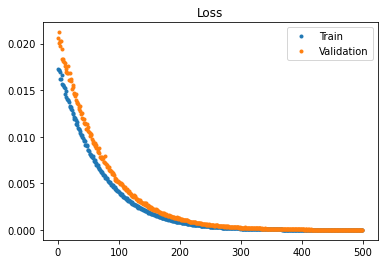

In [35]:
plt.title("Loss")
plt.plot(range(len(history.history['loss'])), history.history['loss'], '.', label="Train");
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], '.',label="Validation");
plt.legend();

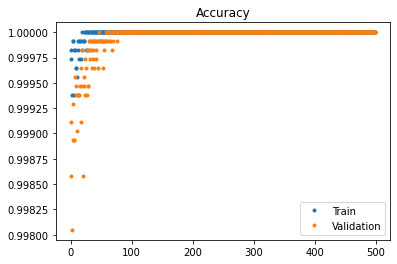

In [36]:
plt.title("Accuracy")
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], '.', label="Train");
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], '.',label="Validation");
plt.legend();

In [37]:
model.evaluate(x_test, y_test, batch_size=1024)

1024/1024 [==============================] - 0s 21us/sample - loss: 1.5453e-05 - accuracy: 1.0000


[1.5452518709935248e-05, 1.0]

In [38]:
def binarize(array):
    binary_array = np.zeros([len(array), len(array[0])])
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i][j] < 0.5:
                binary_array[i][j] = 0
            else:
                binary_array[i][j] = 1
    return binary_array

## Error 

In [39]:
y_pred = model.predict(x_test)
by_pred = binarize(model.predict(x_test))

In [40]:
loss_vec = np.zeros([len(y_pred), len(y_pred[0])])
for i in range(len(y_pred)):
    for j in range(len(y_pred[0])):
        loss_vec[i][j] = (1/2)*(y_pred[i][j]-y_test[i][j])**2

loss = np.zeros(len(loss_vec))
for i in range(len(loss_vec)):
    loss[i] = loss_vec[i].sum()
    

#bloss_vec = np.zeros([len(by_pred), len(y_pred[0])])
#for i in range(len(by_pred)):
#    for j in range(len(by_pred[0])):
#        loss_vec[i][j] = (1/2)*(by_pred[i][j]-y_test[i][j])**2

#bloss = np.zeros(len(bloss_vec))
#for i in range(len(bloss_vec)):
#    bloss[i] = bloss_vec[i].sum()

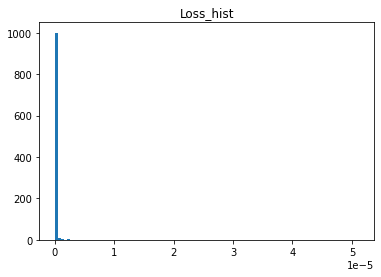

In [58]:
plt.title('Loss_hist')
plt.hist(loss, bins = 100)
plt.show()

In [45]:
#plt.hist(bloss, bins = 100)
#plt.show()

In [46]:
#predictions = model.predict(x[1024:])
#binary_predictions = binarize(predictions)

In [47]:
#plt.imshow(predictions[-20:])
#plt.show()

In [48]:
#plt.imshow(binary_predictions[-20:])
#plt.show()

In [49]:
#plt.imshow(y[-20:])
#plt.show()

## Evolution test


In [42]:
def ca_ml(initial_state, generations):
    initial_state = initial_state
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        aux = [[0]]
        aux[0][0] = grid[i]
        grid[i+1] = binarize(model.predict(aux))[0]
    
    return grid

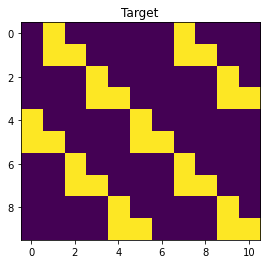

In [51]:
plt.title("Target")
plt.imshow((ca(20, x_test[0], 10)))
plt.show()

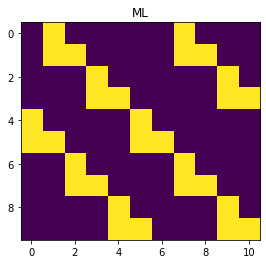

In [52]:
plt.title("ML")
plt.imshow(ca_ml(x_test[0], 10))
plt.show()

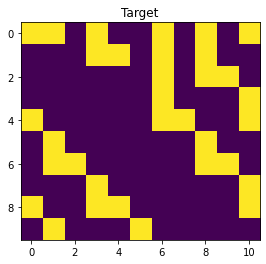

In [53]:
plt.title("Target")
plt.imshow((ca(20, x_test[10], 10)))
plt.show()

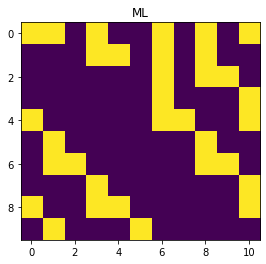

In [54]:
plt.title("ML")
plt.imshow(ca_ml(x_test[10], 10))
plt.show()